# Python Challenge 

## Question: Analyzing Monthly Sales Trends

### Background:
You have been provided with two CSV files: `orders.csv` containing order information and `order_details.csv` containing details of each order.

### Goal:
Aggregate the monthly total sales (amount) for the "Electronics" category and plot a line graph to visualize trends

### Tasks:
- Load the data from `orders.csv` and `order_details.csv` into pandas DataFrames.
- Convert the order_date column to datetime format
- Combine the two dataframes
- Subset the data to include only orders and order details related to the "Electronics" category.
- Aggregate the monthly total sales (amount) for the "Electronics" category.
- Plot a line graph to visualize the monthly sales trends for the "Electronics" category (code provided).

### Expected Output:
A line plot showing the monthly total sales trends for the "Electronics" category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
order_details = pd.read_csv('data/order_details_clean.csv')
orders = pd.read_csv('data/orders_clean.csv')

In [3]:
order_details.dtypes

order_id         object
amount          float64
profit          float64
quantity          int64
category         object
sub_category     object
dtype: object

In [4]:
orders.dtypes

order_id         object
order_date       object
customer_name    object
state            object
city             object
dtype: object

In [5]:
orders.head()

,order_id,order_date,customer_name,state,city
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata


In [6]:
order_details.head()

,order_id,amount,profit,quantity,category,sub_category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [7]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

- Load the data from `orders.csv` and `order_details.csv` into pandas DataFrames.
- Convert the order_date column to datetime format
- Combine the two dataframes
- Subset the data to include only orders and order details related to the "Electronics" category.
- Aggregate the monthly total sales (amount) for the "Electronics" category.
- Plot a line graph to visualize the monthly sales trends for the "Electronics" category (code provided).

In [9]:
total_orders = orders.merge(order_details, on='order_id')
total_orders.head()

,order_id,order_date,customer_name,state,city,amount,profit,quantity,category,sub_category
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [10]:
total_orders['category'].unique()

array(['Furniture', 'Clothing', 'Electronics'], dtype=object)

In [12]:
eletronics_orders = total_orders[total_orders['category'] == 'Electronics']
eletronics_orders.head()

,order_id,order_date,customer_name,state,city,amount,profit,quantity,category,sub_category
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
5,B-25602,2018-04-01,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones
6,B-25602,2018-04-01,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
25,B-25608,2018-04-08,Aarushi,Tamil Nadu,Chennai,856.0,385.0,6,Electronics,Printers


In [17]:
eletronics_orders['order_date'].dt.year.unique()

array([2018, 2019], dtype=int32)

In [19]:
eletronics_orders['order_date'] = eletronics_orders['order_date'].dt.strftime('%Y-%m')

/var/folders/j5/gkrrbxf15_d87ky2rm4hncpw0000gp/T/ipykernel_33288/3095401291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eletronics_orders['order_date'] = eletronics_orders['order_date'].dt.strftime('%Y-%m')


In [21]:
eletronics_orders.groupby('order_date')[['amount']].sum()

,amount
order_date,
2018-04,11127.0
2018-05,12807.0
2018-06,9344.0
2018-07,6502.0
2018-08,9539.0
2018-09,7207.0
2018-10,13361.0
2018-11,16651.0
2018-12,18560.0


In [22]:
monthly_sales = eletronics_orders.groupby('order_date')[['amount']].sum()

<Figure size 1000x600 with 0 Axes>

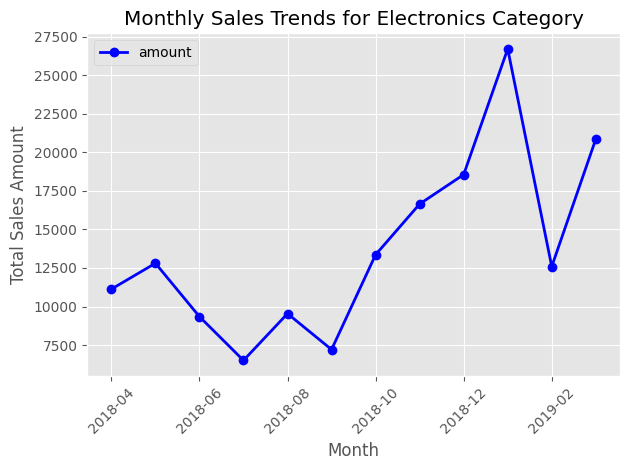

In [23]:
# !! The prepared dataframe should be called monthly_sales
# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Monthly Sales Trends for Electronics Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()